In [1]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = "99"

import cv2
import numpy as np
import tensorflow as tf
import json
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

from yolov3.dataset import load_tfrecord_dataset, transform_images,transform_targets
from yolov3.utils import draw_outputs

In [2]:
data_path = '/home/jovyan/DATA/googlemap/tfrecord/mosaic2.tfrecord'
class_path = '/home/jovyan/DATA/googlemap/tfrecord/google.names'
config_path = '../configs/default.json'

In [3]:
with open(config_path,'r') as f: config = json.load(f)

In [4]:
class_names = [c.strip() for c in open(class_path).readlines()]

dataset = load_tfrecord_dataset(data_path, class_path, 800)
# dataset = dataset.shuffle(512)

labels:


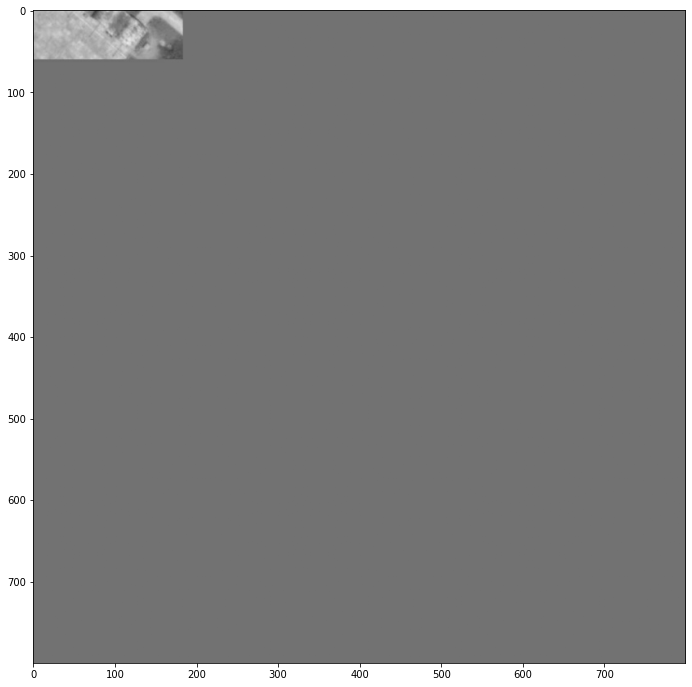

labels:


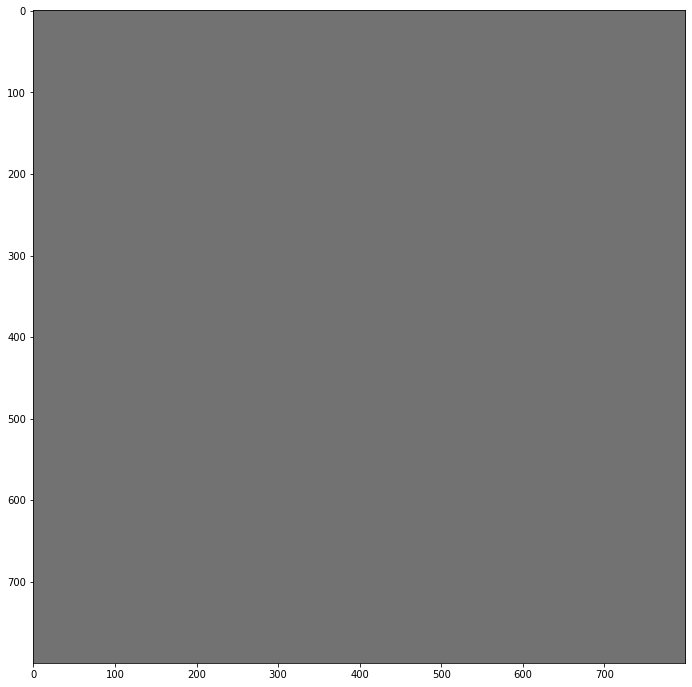

labels:


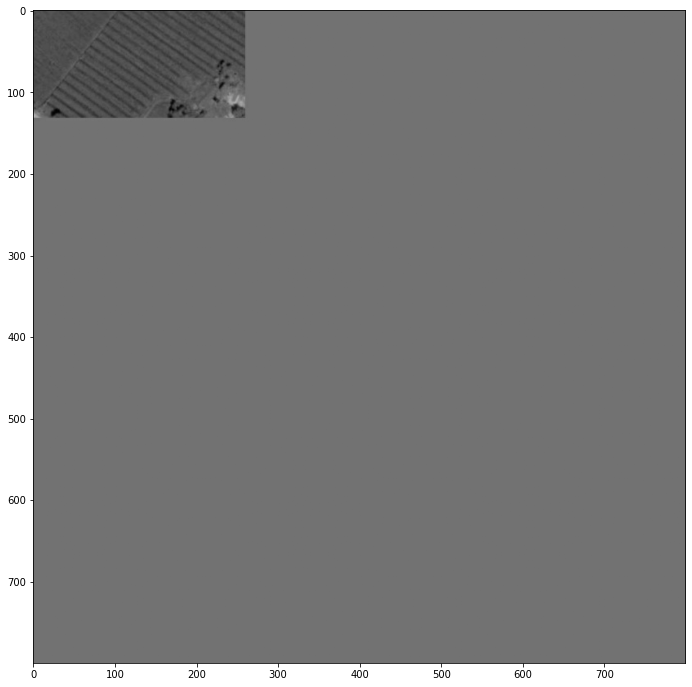

labels:


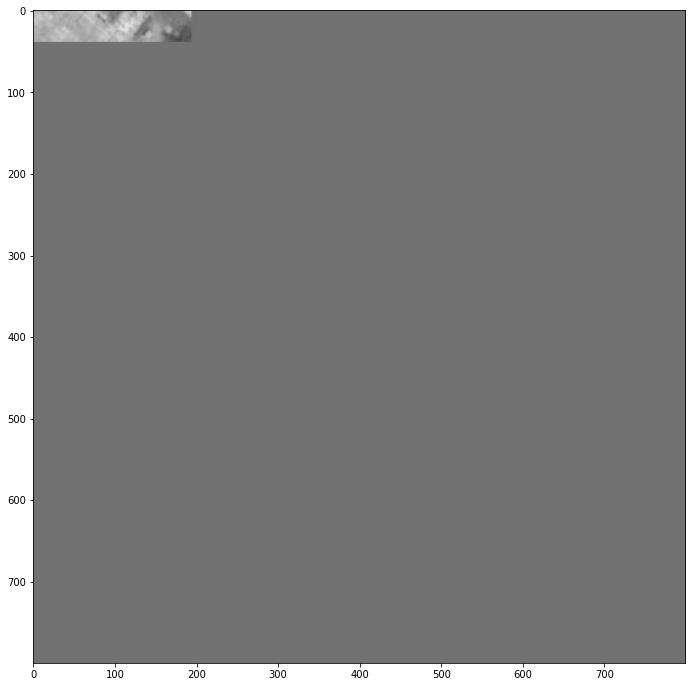

In [5]:
for image, labels in dataset.take(4):
    boxes = []
    scores = []
    classes = []
    for x1, y1, x2, y2, label in labels:
        if x1 == 0 and x2 == 0:
            continue

        boxes.append((x1, y1, x2, y2))
        scores.append(1)
        classes.append(label)
        
    nums = [len(boxes)]
    boxes = [boxes]
    scores = [scores]
    classes = [classes]

    print('labels:')
    for i in range(nums[0]):
        print('\t{}, {}, {}'.format(class_names[int(classes[0][i])],np.array(scores[0][i]),np.array(boxes[0][i])))
        
    img = cv2.cvtColor(image.numpy(), cv2.COLOR_RGB2BGR)
    img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
    
    
    plt.figure(figsize=(12,12))
    plt.imshow(img/255)
    plt.show()